### Cocktail API
https://www.thecocktaildb.com/api.php

In [451]:
#letter = 's'
alphabet = 'abcdefghijklmnopqrstuvwxyz'
ingredients = []
alcohols = ['gin', 'grand marnier', 'amaretto', 'baileys irish cream', 'cognac', '151 proof rum', 'wild turkey', 'dark rum', 'absolut vodka', 'applejack', 'strawberry schnapps', 'vodka', 'pisang ambon', 'vermouth', 'kahlua', 'light rum', 'triple sec', 'scotch', 'sweet vermouth', 'dry vermouth', 'orange bitters', 'rum', 'tequila', 'creme de banane', 'frangelico', 'creme de cacao', 'blended whiskey', 'bourbon', 'blackberry brandy', 'sambuca', 'green chartreuse', 'irish cream', 'goldschlager', 'champagne', 'peach schnapps', 'creme de mure', 'bitters', 'blue curacao', 'rye whiskey', 'maraschino liqueur', 'angostura bitters', 'galliano', 'prosecco', 'cherry heering', 'wormwood', 'corona', 'bacardi limon', 'everclear', 'sloe gin', 'midori melon liqueur', 'jägermeister', 'southern comfort', 'sour mix', 'banana liqueur', 'brandy', 'cachaca', 'spiced rum', 'cherry brandy', 'falernum', 'añejo rum', 'blackstrap rum', 'white rum', 'lager', 'campari', 'port', 'cointreau', 'lillet blanc', 'absinthe', 'chocolate liqueur', 'wine', 'peach bitters', 'cider', 'blackcurrant cordial', 'ginger beer', 'demerara sugar', 'pisco', 'st. germain', 'whiskey', 'hot damn', 'dubonnet rouge', 'apricot brandy', 'mezcal', 'coffee liqueur', 'benedictine', 'firewater', 'absolut peppar', 'beer', 'peach vodka', 'red wine', 'malibu rum', 'green creme de menthe', 'whisky', 'irish whiskey', 'peach brandy', 'guinness stout', 'aperol', 'chambord raspberry liqueur', 'jack daniels', 'anis', 'yellow chartreuse', 'apple brandy', 'tennessee whiskey', 'creme de cassis', 'kiwi liqueur', 'bitter lemon', 'absolut kurant', 'cranberry vodka', 'apfelkorn', 'schweppes russchian', 'absolut citron', 'drambuie', 'tia maria', 'coconut liqueur', 'orgeat syrup', 'white creme de menthe', 'butterscotch schnapps', 'jagermeister', 'rosemary syrup', 'orange curacao', 'blended scotch', 'islay single malt scotch', 'passoa', 'cherry liqueur', 'coffee brandy', 'lime vodka', 'sherry', 'black sambuca', 'crown royal', 'raspberry vodka', 'ricard', 'peychaud bitters', 'amaro montenegro', 'ruby port', 'advocaat', 'jim beam', 'godiva liqueur', 'fresca', 'rosso vermouth', 'yukon jack', 'white wine', 'gold rum', 'pernod', 'ouzo', 'zima']



In [453]:
import requests

def search(letter, outfile, outfile2, url = 'https://www.thecocktaildb.com/api/json/v1/1/search.php'): 
    # API endpoint for searching cocktails by name

    # Query parameters for searching cocktails
    params = {
        'f': letter  # The letter to search for
    }

    all_ingredients = []

    # Send a GET request to the API endpoint with the query parameters
    response = requests.get(url, params=params)

    # Parse the JSON response
    data = response.json()

    # Check if the request was successful
    if response.status_code == 200 and data['drinks'] is not None:
        # Loop through each cocktail in the response
        for cocktail in data['drinks']:
            # Extract the cocktail name and ingredient list
            cocktail_name = cocktail['strDrink']
            ingredient_list = []
            for i in range(1, 16):
                ingredient = cocktail['strIngredient' + str(i)]
                if ingredient:
                    ingredient_list.append(ingredient.lower())

            all_ingredients.append(ingredient_list)
            
            # Print the cocktail name and ingredient list
            outfile2.write(cocktail_name + "\n")
            outfile.write(', '.join(ingredient_list) + "\n")

            # print('Cocktail Name:', cocktail_name)
            # print('Ingredient List:', ', '.join(ingredient_list))
            # print('---')
    else:
        print('No cocktails found.')
    #print(all_ingredients)
    return all_ingredients

In [454]:
outfile = open("ingredients.txt", "w")
outfile2 = open("names.txt", "w")
all_ingredients = []
desiredalc = 'gin'
for letter in alphabet: 
    all_ingredients += search(letter, outfile, outfile2)
print(all_ingredients)
#all_ingredients = search("a", outfile, outfile2)
outfile.close()
outfile2.close()


No cocktails found.
No cocktails found.
[['gin', 'grand marnier', 'lemon juice', 'grenadine'], ['amaretto', 'baileys irish cream', 'cognac'], ['gin', 'grenadine', 'heavy cream', 'milk', 'egg white'], ['151 proof rum', 'wild turkey'], ['dark rum', 'lemon juice', 'grenadine'], ['absolut vodka', 'gin', 'tonic water'], ['applejack', 'grapefruit juice'], ['strawberry schnapps', 'orange juice', 'cranberry juice', 'club soda'], ['orange juice', 'grapefruit juice', 'apple juice', 'maraschino cherry'], ['vodka', 'pisang ambon', 'apple juice', 'lemon juice', 'lemonade'], ['dark rum', 'peach nectar', 'orange juice'], ['gin', 'vermouth'], ['dark rum', 'kahlua', 'egg white'], ['light rum', 'triple sec', 'lime juice', 'sugar', 'egg white', 'mint'], ['scotch', 'sweet vermouth', 'dry vermouth', 'orange bitters'], ['applejack', 'triple sec', 'lemon juice'], ['gin', 'lemon juice', 'maraschino liqueur'], ['rum', 'vodka', 'tequila', 'triple sec', 'fruit', 'ice', 'salt', 'fruit juice'], ['sweet vermouth', 

### Networkx graph

In [483]:
import itertools
import random
import networkx as nx
import matplotlib.pyplot as plt

def dograph(ingredients): 

    # Create an empty directed graph
    G = nx.DiGraph()
    all_ingredients = [random.sample(x, len(x)) for x in select_ings]
    random.shuffle(all_ingredients)
    #print(all_ingredients)

    # Add all possible combinations of two ingredients as edges in the graph with edge weights
    for list in all_ingredients: 
        for pair in itertools.combinations(list, 2):
            ingredient1 = pair[0]
            ingredient2 = pair[1]
            
            # Check if ingredient1 is already in the graph
            if G.has_node(ingredient1):
                found = False
                # Check if ingredient2 is already a connected edge in the graph for ingredient1
                for edge in G.out_edges(ingredient1, data=True):
                    if edge[1] == ingredient2:
                        # Increment the weight by 1 if the edge is not new
                        G[ingredient1][ingredient2]['weight'] += 1
                        if (ingredient1 not in alcohols or ingredient2 not in alcohols): 
                           G[ingredient1][ingredient2]['weight'] += 1
                        found = True
                        break
                # If ingredient2 is a new edge for ingredient1, add it with weight 1
                if not found:
                    G.add_edge(ingredient1, ingredient2, weight=1)
            else:
                # If ingredient1 is not in the graph, add it with ingredient2 as the connected edge with weight 1
                G.add_edge(ingredient1, ingredient2, weight=1)

            # Check if ingredient2 is already in the graph
            if G.has_node(ingredient2):
                found = False
                # Check if ingredient2 is already a connected edge in the graph for ingredient1
                for edge in G.out_edges(ingredient2, data=True):
                    if edge[1] == ingredient1:
                    
                        # Increment the weight by 1 if the edge is not new
                        G[ingredient2][ingredient1]['weight'] += 1
                        if (ingredient1 not in alcohols or ingredient2 not in alcohols): 
                            G[ingredient2][ingredient1]['weight'] += 1
                        
                        found = True
                        break
                # If ingredient1 is a new edge for ingredient2, add it with weight 1
                if not found:
                    G.add_edge(ingredient2, ingredient1, weight=1)
            else:
                # If ingredient2 is not in the graph, add it with ingredient1 as the connected edge with weight 1
                G.add_edge(ingredient2, ingredient1, weight=1)
    return G

# Draw the graph


In [506]:
masterpathlist = []
for alc in alcohols: 
    select_ings = [x for x in all_ingredients if alc in x]
    G = dograph(select_ings)
    largest_cc = max(nx.strongly_connected_components(G), key=len)
    # Create a subgraph containing only the nodes and edges in the largest connected component
    connected_nodes = G.subgraph(largest_cc)
    # Print the nodes in the largest connected component
    print("Nodes in the Largest Connected Component: ", connected_nodes.nodes())
    max_valued_paths = nx.all_pairs_dijkstra_path(connected_nodes, weight='weight')
    sorted_paths = sorted(max_valued_paths, key=lambda x: max(nx.path_weight(G, p, weight='weight') for p in x[1].values()), reverse=False)
    # Find the maximum value among the values of all paths
    max_value = max(max(nx.path_weight(connected_nodes, p, weight='weight') for p in paths.values()) for _, paths in sorted_paths)
    # print(max_value)
    # Find the path with the largest value among all maximum-valued paths
    # largest_value = 0
    largest_value_path = []
    # Print all maximum-valued paths and their values
    for source_node, paths in sorted_paths:
        for target_node, path in paths.items():
            value = nx.path_weight(G, path, weight='weight')
            if value == max_value:
                print("Path =", path, ", Value =", value)
                # largest_value = value
                largest_value_path.append(path)

    #print(largest_value_path)
    masterpathlist += largest_value_path
    random_large_path = random.choice(largest_value_path)
    #print("Path with the largest value among all maximum-valued paths:")
    #print("Path =", random_large_path, ", Value =", max_value)

#print(masterpathlist)


#print(select_ings)

Nodes in the Largest Connected Component:  ['gin', 'orange spiral', 'lemon peel', 'powdered sugar', 'carbonated water', 'lemon', 'absinthe', 'lillet blanc', 'lemon juice', 'triple sec', 'water', 'orange peel', 'orange juice', 'apricot brandy', 'soda water', 'rosemary', 'rosemary syrup', 'orange bitters', 'egg yolk', 'maraschino liqueur', 'pineapple juice', 'grand marnier', 'grenadine', 'aperol', 'lime juice', 'tequila', 'coca-cola', 'light rum', 'vodka', 'pineapple', 'strawberries', 'cranberry juice', 'benedictine', 'creme de cacao', 'light cream', 'nutmeg', 'melon liqueur', 'prosecco', 'salt', 'grapefruit juice', 'green chartreuse', 'yellow chartreuse', 'ginger ale', 'lime', 'egg white', 'bitters', 'anis', 'dry vermouth', 'tonic water', 'ice', 'club soda', 'maraschino cherry', 'sugar', 'orange', 'champagne', 'orange curacao', 'angostura bitters', 'sugar syrup', 'sweet vermouth', 'brandy', 'vermouth', 'chambord raspberry liqueur', 'rum', 'malibu rum', 'midori melon liqueur', 'campari',

In [535]:
random_large_path = random.choice(masterpathlist)

print("Path =", random_large_path, ", Value =", max_value)

Path = ['honey', 'white rum', 'mango'] , Value = 2


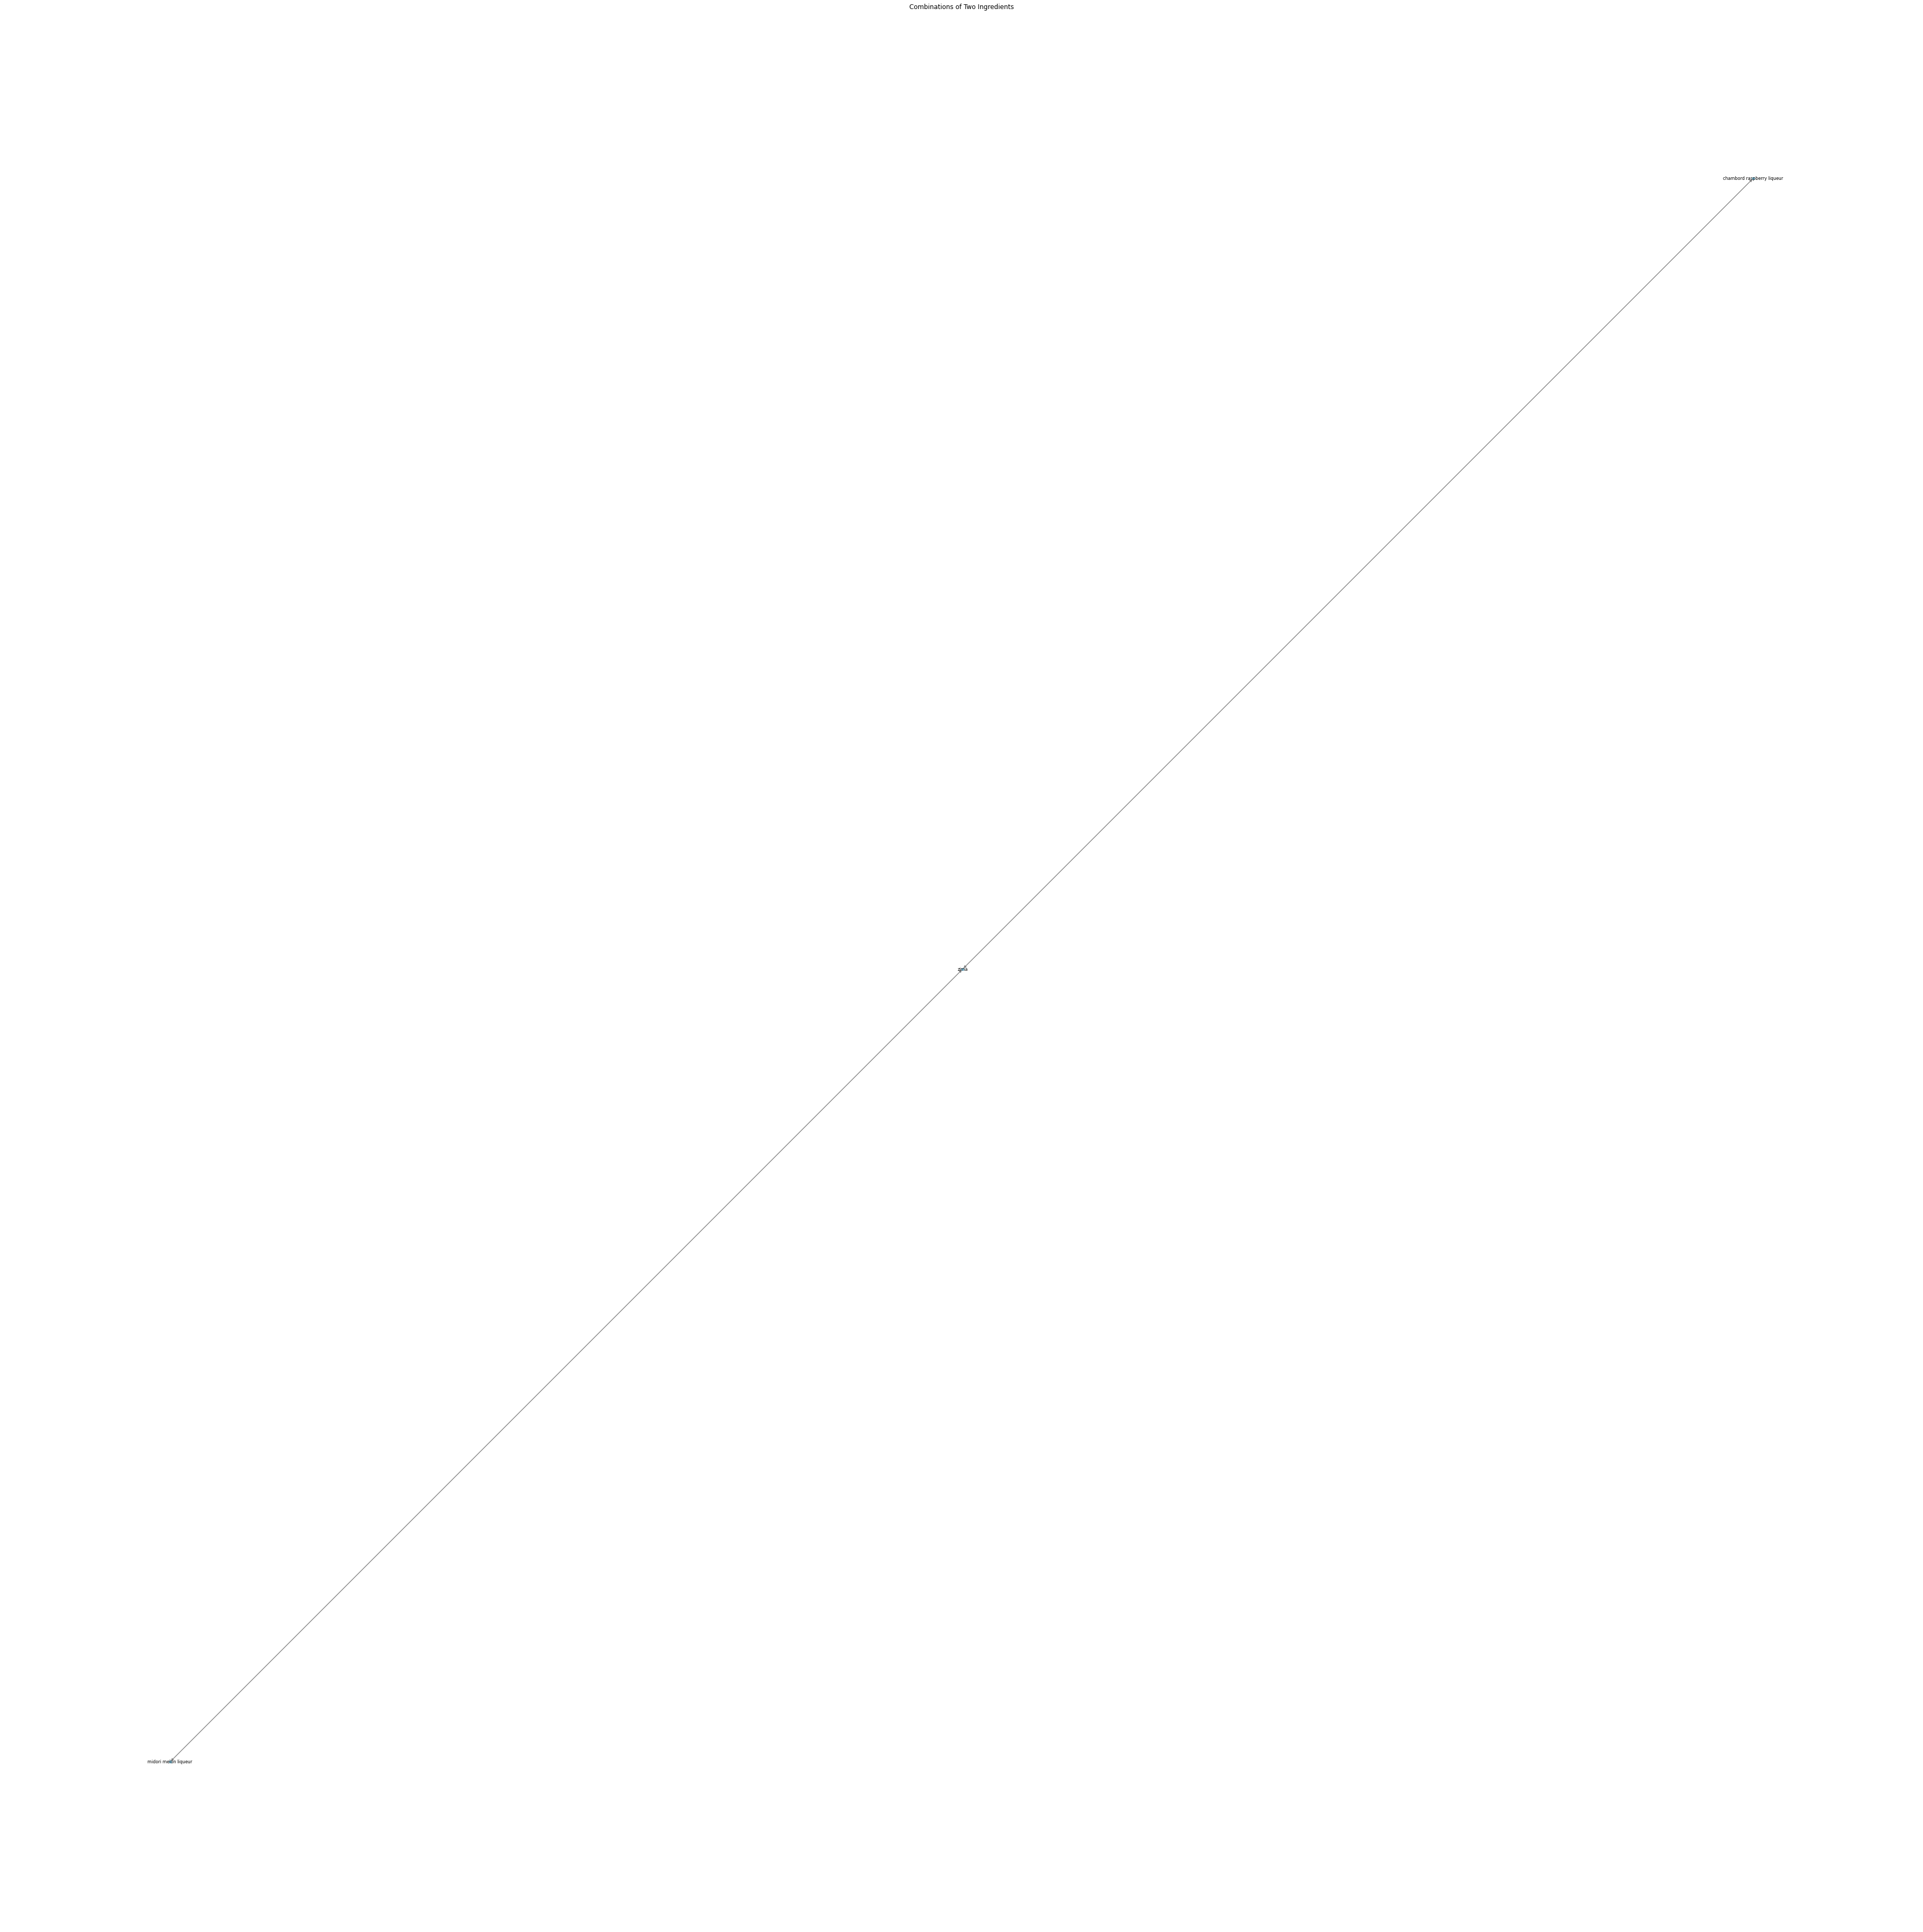

In [346]:
#draw graph
pos = nx.spring_layout(G,)
plt.figure(figsize=(50,50))
nx.draw(G, pos, with_labels=True, node_size=20, font_size=8, font_color='black', node_color='skyblue', edge_color='gray')
plt.title('Combinations of Two Ingredients')
plt.show()
